In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import joblib
import gc

EDA

In [2]:
data = pd.read_json("transactions.txt", lines=True)
data.shape

(786363, 29)

In [3]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [4]:
# check empty data 
data.replace("", np.nan, inplace=True)
data.isna().sum()

/var/folders/dw/3r081_b1335dzvqm6llcz3540000gn/T/ipykernel_46764/961830926.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("", np.nan, inplace=True)


accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [6]:
all(data["accountNumber"] == data["customerId"])

True

In [7]:
# drop columns
cols_to_exclude = ["accountNumber", "echoBuffer", "merchantCity", "merchantState", "merchantZip", "posOnPremises", "recurringAuthInd"]
data.drop(cols_to_exclude, axis=1, inplace=True)

In [8]:
data["transactionDateTime"] = pd.to_datetime(data["transactionDateTime"])
data["accountOpenDate"] = pd.to_datetime(data["accountOpenDate"])

In [9]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customerId                786363 non-null  int64         
 1   creditLimit               786363 non-null  int64         
 2   availableMoney            786363 non-null  float64       
 3   transactionDateTime       786363 non-null  datetime64[ns]
 4   transactionAmount         786363 non-null  float64       
 5   merchantName              786363 non-null  object        
 6   acqCountry                781801 non-null  object        
 7   merchantCountryCode       785639 non-null  object        
 8   posEntryMode              782309 non-null  object        
 9   posConditionCode          785954 non-null  object        
 10  merchantCategoryCode      786363 non-null  object        
 11  currentExpDate            786363 non-null  object        
 12  ac

In [10]:
data.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [11]:
data.nunique(dropna=False)

customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

In [40]:
# histogram function
def histo(visual_rows, bins):

    fraud_counts = visual_rows.value_counts()
    fraud_percentages = (fraud_counts / len(visual_rows)) * 100
    # Plot the histogram
    plt.figure(figsize=(6,3))
    plt.hist(visual_rows, bins=bins, edgecolor='black')
    # Add labels and title
    plt.xlabel('isFraud (True/False)')
    plt.ylabel('Frequency')
    plt.title('Histogram of isFraud in selected Rows')

    for i, count in enumerate(fraud_counts):
        percentage = fraud_percentages[i]
        plt.text(i, count + 5, f'{percentage:.2f}%', ha='center', fontsize=12)


    # Show the plot
    plt.show()

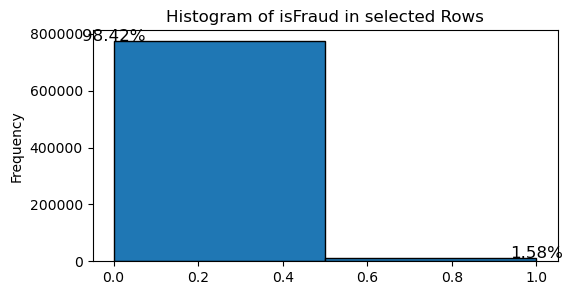

In [42]:
histo(data["isFraud"].astype(int), bins=2)

1. Miss-match info
- Country/location patterns
- CVV

In [14]:
mismatched_country = data[data["acqCountry"] != data["merchantCountryCode"]]

/var/folders/dw/3r081_b1335dzvqm6llcz3540000gn/T/ipykernel_46764/736608690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatched_country["isFraud"] = mismatched_country["isFraud"].astype(int)


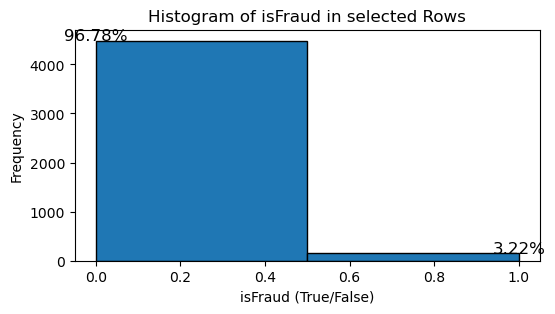

In [15]:
mismatched_country["isFraud"] = mismatched_country["isFraud"].astype(int)
histo(mismatched_country["isFraud"])

/var/folders/dw/3r081_b1335dzvqm6llcz3540000gn/T/ipykernel_46764/3076263274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatched_cvv["isFraud"] = mismatched_cvv["isFraud"].astype(int)


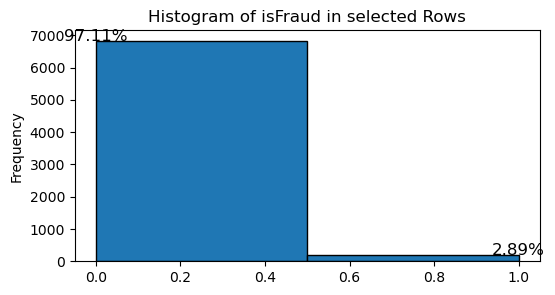

In [46]:
mismatched_cvv = data[data["cardCVV"] != data["enteredCVV"]]
mismatched_cvv["isFraud"] = mismatched_cvv["isFraud"].astype(int)
histo(mismatched_cvv["isFraud"], bins=2)

2. Amount/transaction patterns.

In [16]:
data_sorted = data.sort_values(by=['creditLimit', 'customerId', 'transactionDateTime'])

In [17]:
data_sorted.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
151421,100737756,250,250.00,2016-01-07 09:37:09,1.86,1st Sandwitch Bar #396252,US,US,05,01,...,2015-06-21,2015-06-21,463,463,4317,PURCHASE,0.00,True,False,False
151422,100737756,250,248.14,2016-01-08 16:20:51,193.25,Downtown Pub,US,US,02,01,...,2015-06-21,2015-06-21,463,463,4317,PURCHASE,1.86,True,False,False
151423,100737756,250,54.89,2016-01-10 21:02:12,650.62,Franks Pub #87366,US,US,09,01,...,2015-06-21,2015-06-21,463,463,4317,PURCHASE,195.11,True,False,False
151424,100737756,250,-319.58,2016-01-12 17:46:25,0.00,Downtown Sandwitch Bar,US,US,02,01,...,2015-06-21,2015-06-21,463,463,4317,ADDRESS_VERIFICATION,569.58,False,False,False
151425,100737756,250,159.70,2016-01-13 21:29:12,104.11,Franks Pub #87366,US,US,05,01,...,2015-06-21,2015-06-21,463,463,4317,PURCHASE,90.30,True,False,False


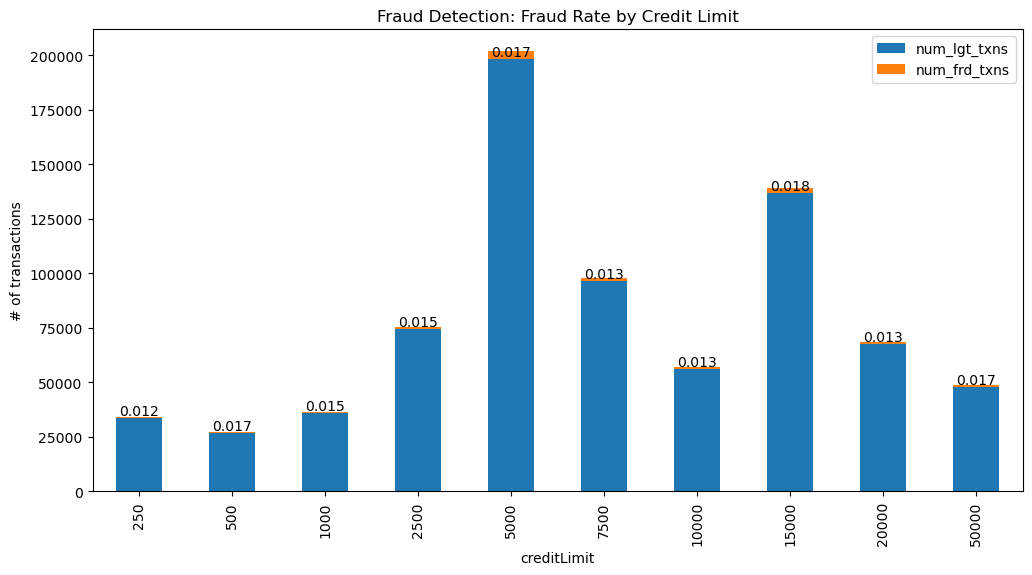

In [19]:
# Feature: customerId
fea = "creditLimit"

# Group data by customerId and isFraud, and count occurrences
ans = (data_sorted[[fea, "isFraud"]].groupby([fea, "isFraud"], dropna=False).size()
       .reset_index(name="num_events")
       .pivot(index=fea, columns="isFraud", values="num_events"))

# Rename the columns
ans.columns = ["num_lgt_txns", "num_frd_txns"]

# Fill NaN values (if a customer has only fraudulent or only legitimate transactions)
ans = ans.fillna(0)

# Plot a stacked bar chart
ax = ans.plot.bar(stacked=True, figsize=(12, 6))

# Calculate the fraud rate
ans["fraud_rate"] = np.round(ans["num_frd_txns"] / (ans["num_frd_txns"] + ans["num_lgt_txns"]), 3)

# Add fraud rate labels on the bars
ax.bar_label(ax.containers[0], labels=ans["fraud_rate"].values)

# Set plot labels and title
ax.set_ylabel("# of transactions")
ax.set_title("Fraud Detection: Fraud Rate by Credit Limit")

# Show the plot
plt.show()


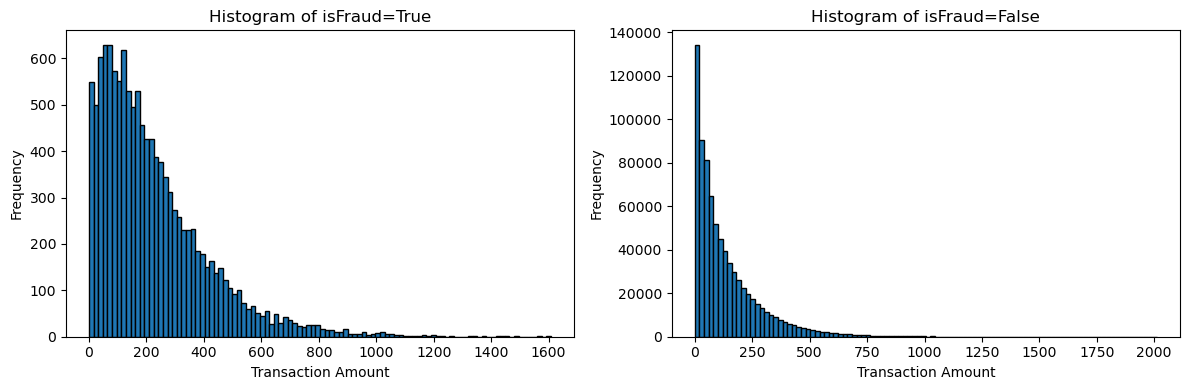

In [49]:
# Filter rows where 'isFraud' is True
fraud_transactions = data_sorted[data_sorted["isFraud"] == True]
non_fraud_transactions = data_sorted[data_sorted["isFraud"] == False]

# Extract the 'transactionAmount' column from the filtered rows
fraud_transaction_amounts = fraud_transactions["transactionAmount"]
non_fraud_transaction_amounts = non_fraud_transactions["transactionAmount"]

plt.figure(figsize=(12, 4))  # Adjust the figure size for a wider layout
# Plot for 'isFraud == True'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(fraud_transaction_amounts, bins=100, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of isFraud=True')

# Plot for 'isFraud == False'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(non_fraud_transaction_amounts, bins=100, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of isFraud=False')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [50]:
transaction_counts = fraud_transaction_amounts.value_counts()
most_frequent_transaction = transaction_counts.idxmax()

# Get the frequency of the most frequent transaction
max_frequency = transaction_counts.max()

print(f"The transaction amount with the highest frequency is: {most_frequent_transaction}")
print(f"The highest frequency is: {max_frequency}")

The transaction amount with the highest frequency is: 0.0
The highest frequency is: 122


4. Merchant type

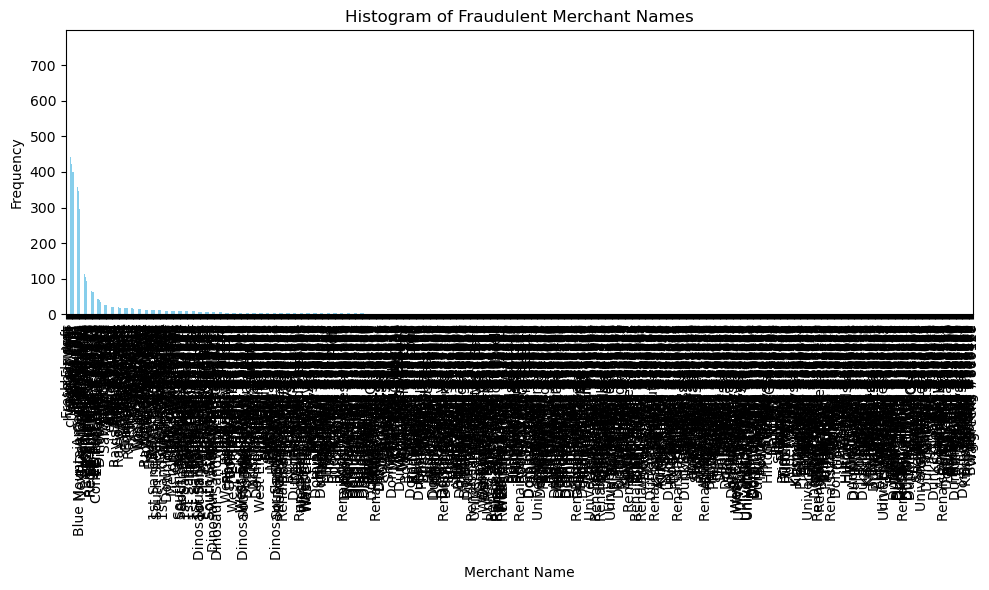

The most frequent merchant is: Lyft


In [59]:
# Filter rows where 'isFraud' is True
fraud_merchant = data_sorted[data_sorted["isFraud"] == True]
unique_merchants = fraud_merchant["merchantName"].unique()

# Plot histogram of merchant names
plt.figure(figsize=(10, 6))
fraud_merchant["merchantName"].value_counts().plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Histogram of Fraudulent Merchant Names')
plt.xlabel('Merchant Name')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()
# Show the plot
plt.show()

# Find the most frequent merchant name
most_frequent_merchant = fraud_merchant["merchantName"].value_counts().idxmax()
print(f"The most frequent merchant is: {most_frequent_merchant}")


# Extract the 'transactionAmount' column from the filtered rows
# fraud_merchant_amounts = fraud_merchant["merchantName"]

# plt.figure(figsize=(12, 4))  # Adjust the figure size for a wider layout
# # Plot for 'isFraud == True'
# # plt.subplot(2, 1, 1)  # 1 row, 2 columns, 1st subplot
# plt.hist(fraud_merchant_amounts, bins=100, edgecolor='black')
# plt.xlabel('Transaction Amount')
# plt.ylabel('Frequency')
# plt.title('Histogram of isFraud=True')

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()

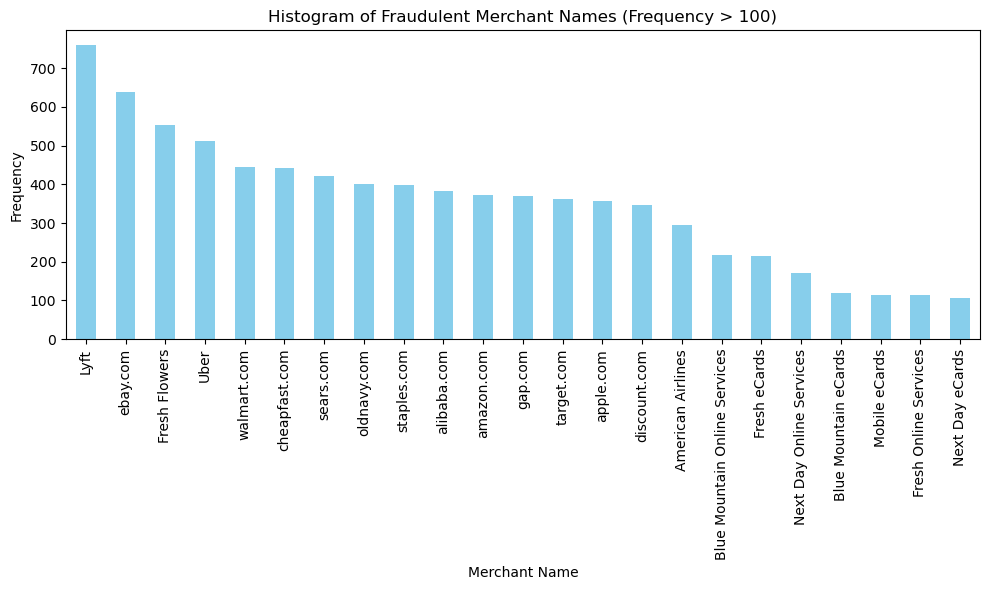

The most frequent merchant with more than 100 transactions is: Lyft


In [60]:
import matplotlib.pyplot as plt

# Filter merchant names that have a frequency higher than 100
merchant_counts = fraud_merchant["merchantName"].value_counts()
filtered_merchants = merchant_counts[merchant_counts > 100]

# Plot histogram of filtered merchant names
plt.figure(figsize=(10, 6))
filtered_merchants.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title('Histogram of Fraudulent Merchant Names (Frequency > 100)')
plt.xlabel('Merchant Name')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# Find the most frequent merchant name among the filtered ones
most_frequent_filtered_merchant = filtered_merchants.idxmax()
print(f"The most frequent merchant with more than 100 transactions is: {most_frequent_filtered_merchant}")


Data Aggregation

1. Function as time

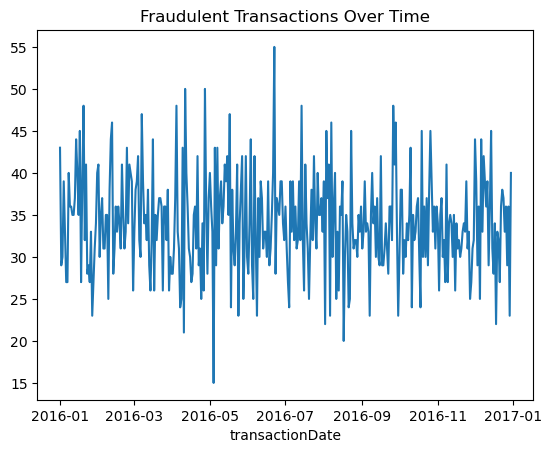

In [62]:
data_sorted['transactionDate'] = data_sorted['transactionDateTime'].dt.date  # Extract date
fraud_by_date = data_sorted.groupby('transactionDate')['isFraud'].sum()
fraud_by_date.plot(kind='line', title='Fraudulent Transactions Over Time')
plt.show()


In [66]:
# mismatched_country = data_sorted[data_sorted["acqCountry"] != data_sorted["merchantCountryCode"]]
# mismatched_cvv = data_sorted[data_sorted["cardCVV"] != data_sorted["enteredCVV"]]

data_sorted["mismatched_country"] = data_sorted["acqCountry"] == data_sorted["merchantCountryCode"]
data_sorted["mismatched_cvv"] = data_sorted["cardCVV"] == data_sorted["enteredCVV"]

data_sorted.head()


,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionDate,mismatched_country,mismatched_cvv
151421,100737756,250,250.00,2016-01-07 09:37:09,1.86,1st Sandwitch Bar #396252,US,US,05,01,...,463,4317,PURCHASE,0.00,True,False,False,2016-01-07,True,True
151422,100737756,250,248.14,2016-01-08 16:20:51,193.25,Downtown Pub,US,US,02,01,...,463,4317,PURCHASE,1.86,True,False,False,2016-01-08,True,True
151423,100737756,250,54.89,2016-01-10 21:02:12,650.62,Franks Pub #87366,US,US,09,01,...,463,4317,PURCHASE,195.11,True,False,False,2016-01-10,True,True
151424,100737756,250,-319.58,2016-01-12 17:46:25,0.00,Downtown Sandwitch Bar,US,US,02,01,...,463,4317,ADDRESS_VERIFICATION,569.58,False,False,False,2016-01-12,True,True
151425,100737756,250,159.70,2016-01-13 21:29:12,104.11,Franks Pub #87366,US,US,05,01,...,463,4317,PURCHASE,90.30,True,False,False,2016-01-13,True,True


In [67]:
# Calculate the time difference between consecutive transactions
data_sorted["time_diff"] = data_sorted.groupby("customerId")["transactionDateTime"].diff()


In [69]:
data_sorted.fillna("<Unknown>", inplace=True)

/var/folders/dw/3r081_b1335dzvqm6llcz3540000gn/T/ipykernel_46764/2483159635.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<Unknown>' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  data_sorted.fillna("<Unknown>", inplace=True)


In [72]:
data_sorted.isna().sum()

customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
transactionDate             0
mismatched_country          0
mismatched_cvv              0
time_diff                   0
dtype: int64

In [73]:
data_sorted.to_csv("data_pre.csv", index=False)